In [64]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf
import mplfinance as mpf

In [1]:
pip install pandas-datareader

     -------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
apple = pd.read_csv('documents/AAPL.csv',index_col=0,parse_dates=True)
apple

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700


<AxesSubplot:xlabel='Date'>

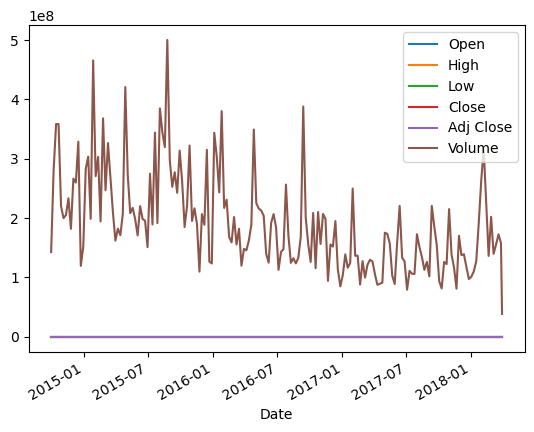

In [4]:
apple.plot()

In [6]:
apple['Daily Chng']=apple['Close']-apple['Open']
apple.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Chng
Date,,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,-0.969993
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.780006
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-3.660004
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,6.900001
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,3.150002


In [7]:
apple['Normalized']=apple['Close']/apple['Close'].iloc[0]
apple.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Chng,Normalized
Date,,,,,,,,
2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700,-0.969993,1.000000
2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200,0.780006,1.011142
2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800,-3.660004,0.980426
2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900,6.900001,1.056214
2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600,3.150002,1.084120


In [8]:
apple['Close'].min()

90.519997

In [9]:
apple.min()

Open          9.239000e+01
High          9.377000e+01
Low           8.947000e+01
Close         9.052000e+01
Adj Close     8.779682e+01
Volume        3.839850e+07
Daily Chng   -1.238001e+01
Normalized    9.086528e-01
dtype: float64

In [10]:
apple['Close'].argmin()

84

In [11]:
apple.iloc[84]

Open          9.300000e+01
High          9.377000e+01
Low           8.947000e+01
Close         9.052000e+01
Adj Close     8.779682e+01
Volume        2.160498e+08
Daily Chng   -2.480003e+00
Normalized    9.086528e-01
Name: 2016-05-09 00:00:00, dtype: float64

In [ ]:
apple['Close'].argmax()

In [12]:
apple.iloc[179:]

,Open,High,Low,Close,Adj Close,Volume,Daily Chng,Normalized
Date,,,,,,,,
2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700,4.769989,1.806665
2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500,-2.269989,1.786991
2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700,-12.380005,1.655692
2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400,-0.290008,1.684200
2018-03-29,167.804993,171.750000,166.899994,167.779999,167.779999,38398505,-0.024994,1.684200


In [13]:
apple['Close'].mean()

127.35266294565217

In [14]:
# dropping labels
apple.drop(labels=['High','Low','Adj Close','Volume'],axis=1)

,Open,Close,Daily Chng,Normalized
Date,,,,
2014-09-29,100.589996,99.620003,-0.969993,1.000000
2014-10-06,99.949997,100.730003,0.780006,1.011142
2014-10-13,101.330002,97.669998,-3.660004,0.980426
2014-10-20,98.320000,105.220001,6.900001,1.056214
2014-10-27,104.849998,108.000000,3.150002,1.084120
...,...,...,...,...
2018-03-05,175.210007,179.979996,4.769989,1.806665
2018-03-12,180.289993,178.020004,-2.269989,1.786991
2018-03-19,177.320007,164.940002,-12.380005,1.655692


In [28]:
# reading data from yahoo finance
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo('AAPL',start)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.561546
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,72.846359
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.426842
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.081497
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.257095


In [5]:
data.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2022-11-30', '2022-12-01', '2022-12-02', '2022-12-05',
               '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-12', '2022-12-13'],
              dtype='datetime64[ns]', name='Date', length=744, freq=None)

In [ ]:
data.dtypes

In [ ]:
type(apple)

In [30]:
# converting to numpy array
arr = data.to_numpy()

In [31]:
arr.shape

(744, 6)

In [32]:
len(data)

744

In [33]:
arr[0]

array([7.51500015e+01, 7.37975006e+01, 7.40599976e+01, 7.50875015e+01,
       1.35480400e+08, 7.35615463e+01])

In [34]:
# first 10 rows, 1 col, and create a copy
small = arr[:10,0].copy()
small

array([75.15000153, 75.14499664, 74.98999786, 75.22499847, 76.11000061,
       77.60749817, 78.16750336, 79.26750183, 79.39250183, 78.875     ])

In [35]:
np.max(small)

79.39250183105469

In [36]:
small.argmax()

8

In [37]:
# getting value
small[small.argmax()]

79.39250183105469

In [38]:
# calculating return: take log
np.log(small)

array([4.31948614, 4.31941954, 4.31735474, 4.3204836 , 4.33217967,
       4.35166405, 4.358854  , 4.37282823, 4.37440393, 4.36786432])

In [39]:
np.log(data)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,4.319486,4.301325,4.304876,4.318654,18.724338,4.298122
2020-01-03,4.319420,4.305753,4.307943,4.308885,18.801326,4.288353
2020-01-06,4.317355,4.293025,4.296571,4.316821,18.589471,4.296290
2020-01-07,4.320484,4.309053,4.316955,4.312107,18.505683,4.291575
2020-01-08,4.332180,4.307976,4.307976,4.328065,18.698912,4.307533
...,...,...,...,...,...,...
2022-12-07,4.965429,4.941642,4.957164,4.948334,18.060014,4.948334
2022-12-08,4.966474,4.949469,4.958359,4.960394,17.944712,4.960394
2022-12-09,4.980657,4.948050,4.958219,4.956953,18.147158,4.956953


In [40]:
# dividing previous value with next value
apple/data.shift()

,Adj Close,Close,Daily Chng,High,Low,Normalized,Open,Volume
Date,,,,,,,,
2014-09-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-12-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
# calculating percentage change
np.sum(np.log(data/data.shift()))

High         0.690944
Low          0.688495
Open         0.702421
Close        0.677342
Volume      -1.341483
Adj Close    0.697874
dtype: float64

In [16]:
np.log(data/data.iloc[0]).tail(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-12-13,0.690944,0.701177,0.702421,0.688642,-2.254099,0.709174


In [ ]:
small.shape

In [ ]:
small

In [ ]:
small.reshape(2,5)

In [19]:
tickers = ['AAPL','MSFT','TSLA','IBM']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start)
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL        MSFT       TSLA         IBM       AAPL   
Date                                                                  
2020-01-02  73.561554  156.151947  28.684000  111.586510  75.087502   
2020-01-03  72.846375  154.207581  29.534000  110.696587  74.357498   
2020-01-06  73.426834  154.606155  30.102667  110.498833  74.949997   
2020-01-07  73.081497  153.196533  31.270666  110.572983  74.597504   
2020-01-08  74.257118  155.636703  32.809334  111.495872  75.797501   

Attributes                                          High              ...  \
Symbols           MSFT       TSLA         IBM       AAPL        MSFT  ...   
Date                                                                  ...   
2020-01-02  160.619995  28.684000  129.464630  75.150002  160.729996  ...   
2020-01-03  158.619995  29.534000  128.432129  75.144997  159.949997  ...   
2020-01-06  159.029999  30.102667  128.202682  74.989998  159.100006  ...   
2020-01-07  157.580002  31.270666  128.288712  75.224998  159.669998  ...   
2020-01-08  160.089996  32.809334  129.359467  76.110001  160.800003  ...   

Attributes        Low                   Open                         \
Symbols          TSLA         IBM       AAPL        MSFT       TSLA   
Date                                                                  
2020-01-02  28.114000  128.843216  74.059998  158.779999  28.299999   
2020-01-03  29.128000  127.686424  74.287498  158.320007  29.366667   
2020-01-06  29.333332  127.342255  73.447502  157.080002  29.364668   
2020-01-07  30.224001  127.533463  74.959999  159.320007  30.760000   
2020-01-08  31.215334  128.030594  74.290001  158.929993  31.580000   

Attributes                   Volume                                      
Symbols            IBM         AAPL        MSFT         TSLA        IBM  
Date                                                                     
2020-01-02  129.063095  135480400.0  22622100.0  142981500.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0  266677500.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0  151995000.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0  268231500.0  3232977.0  
2020-01-08  128.594650  132079200.0  27746500.0  467164500.0  4545916.0  

[5 rows x 24 columns]

In [20]:
data = data['Adj Close']
data.head()

Symbols,AAPL,MSFT,TSLA,IBM
Date,,,,
2020-01-02,73.561554,156.151947,28.684000,111.586510
2020-01-03,72.846375,154.207581,29.534000,110.696587
2020-01-06,73.426834,154.606155,30.102667,110.498833
2020-01-07,73.081497,153.196533,31.270666,110.572983
2020-01-08,74.257118,155.636703,32.809334,111.495872


In [21]:
# suppose I have $100,000, 25% AAPL, 15% MSFT, 40% TSLA, 20% IBM
portfolios = [.25,.15,.40,.20]
np.sum(portfolios)

1.0

In [22]:
# normalize dat
data/data.iloc[0]

Symbols,AAPL,MSFT,TSLA,IBM
Date,,,,
2020-01-02,1.000000,1.000000,1.000000,1.000000
2020-01-03,0.990278,0.987548,1.029633,0.992025
2020-01-06,0.998169,0.990101,1.049458,0.990253
2020-01-07,0.993474,0.981073,1.090178,0.990917
2020-01-08,1.009456,0.996700,1.143820,0.999188
...,...,...,...,...
2022-12-07,1.915947,1.564950,6.067494,1.319783
2022-12-08,1.939192,1.584354,6.046577,1.324354
2022-12-09,1.932531,1.571674,6.242156,1.317812


In [25]:
(data/data.iloc[0])*portfolios*100000

Symbols,AAPL,MSFT,TSLA,IBM
Date,,,,
2020-01-02,25000.000000,15000.000000,40000.000000,20000.000000
2020-01-03,24756.945237,14813.223611,41185.330332,19840.496293
2020-01-06,24954.215266,14851.510821,41978.338919,19805.052241
2020-01-07,24836.852018,14716.102116,43607.120493,19818.342393
2020-01-08,25236.388518,14950.505561,45752.801260,19983.754809
...,...,...,...,...
2022-12-07,47898.662706,23474.250540,242699.753442,26395.664613
2022-12-08,48479.805764,23765.313076,241863.062821,26487.072527
2022-12-09,48313.281877,23575.114129,249686.240352,26356.233104


In [26]:
# working with monte carlo simulation
weight = np.random.random(4)
weight/=weight.sum()
weight

array([0.55437341, 0.27213854, 0.10600065, 0.0674874 ])

In [27]:
weight.sum()

1.0

In [ ]:
# Volatility: relation to price movement = thought as a risk
# called ATR: avg true range
# calculate true range, TR = [H-L,|H-Cp|,|L-Cp|]
# n: time period, H, L, Cp
# financail markets should have price movement to make money, the degree of speed of change in prices in either direction is called volatility
# if volatility increases the potential to make money in short time, short time also increases
# if volatility increases means the higher risk involved

In [35]:
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo('NFLX', start)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,329.980011,324.779999,326.100006,329.809998,4485800,329.809998
2020-01-03,329.859985,325.529999,326.779999,325.899994,3806900,325.899994
2020-01-06,336.359985,321.200012,323.119995,335.829987,5663100,335.829987
2020-01-07,336.700012,330.299988,336.470001,330.750000,4703200,330.750000
2020-01-08,342.700012,331.049988,331.489990,339.260010,7104500,339.260010


In [37]:
# calculating TR
hl = data['High']-data['Low']
hl

Date
2020-01-02     5.200012
2020-01-03     4.329987
2020-01-06    15.159973
2020-01-07     6.400024
2020-01-08    11.650024
                ...    
2022-12-07     7.509979
2022-12-08     7.570007
2022-12-09     9.480011
2022-12-12    14.329987
2022-12-13     7.090912
Length: 744, dtype: float64

In [38]:
h_cp = np.abs(data['High']-data['Close'].shift())
h_cp

Date
2020-01-02          NaN
2020-01-03     0.049988
2020-01-06    10.459991
2020-01-07     0.870026
2020-01-08    11.950012
                ...    
2022-12-07     4.049988
2022-12-08     3.959991
2022-12-09    18.739990
2022-12-12     3.169983
2022-12-13    17.543610
Length: 744, dtype: float64

In [39]:
l_cp = np.abs(data['Low']-data['Close'].shift())
l_cp

Date
2020-01-02          NaN
2020-01-03     4.279999
2020-01-06     4.699982
2020-01-07     5.529999
2020-01-08     0.299988
                ...    
2022-12-07     3.459991
2022-12-08     3.610016
2022-12-09     9.259979
2022-12-12    11.160004
2022-12-13    10.452698
Length: 744, dtype: float64

In [43]:
df = pd.concat([hl,h_cp,l_cp],axis=1)
df.head()

,0,1,2
Date,,,
2020-01-02,5.200012,NaN,NaN
2020-01-03,4.329987,0.049988,4.279999
2020-01-06,15.159973,10.459991,4.699982
2020-01-07,6.400024,0.870026,5.529999
2020-01-08,11.650024,11.950012,0.299988


In [44]:
# true range
tr = np.max(df,axis=1)
tr

Date
2020-01-02     5.200012
2020-01-03     4.329987
2020-01-06    15.159973
2020-01-07     6.400024
2020-01-08    11.950012
                ...    
2022-12-07     7.509979
2022-12-08     7.570007
2022-12-09    18.739990
2022-12-12    14.329987
2022-12-13    17.543610
Length: 744, dtype: float64

In [45]:
avg_tr = tr.rolling(14).mean()
avg_tr

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2022-12-07    11.643563
2022-12-08    11.111422
2022-12-09    11.664278
2022-12-12    12.029992
2022-12-13    12.594535
Length: 744, dtype: float64

In [46]:
# another approach
tr.rolling(14).sum()/14

Date
2020-01-02          NaN
2020-01-03          NaN
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
                ...    
2022-12-07    11.643563
2022-12-08    11.111422
2022-12-09    11.664278
2022-12-12    12.029992
2022-12-13    12.594535
Length: 744, dtype: float64

<AxesSubplot:xlabel='Date'>

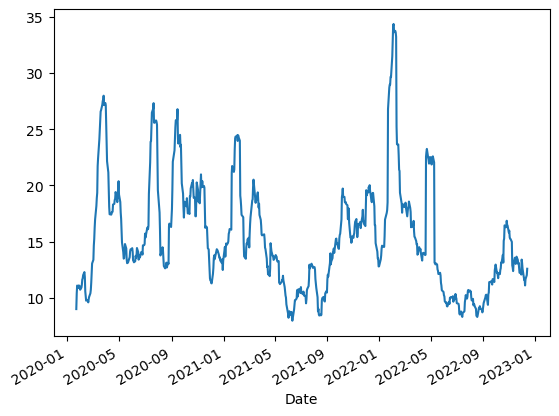

In [47]:
fig,ax = plt.subplots()
avg_tr.plot(ax=ax)

Text(0, 0.5, 'Price')

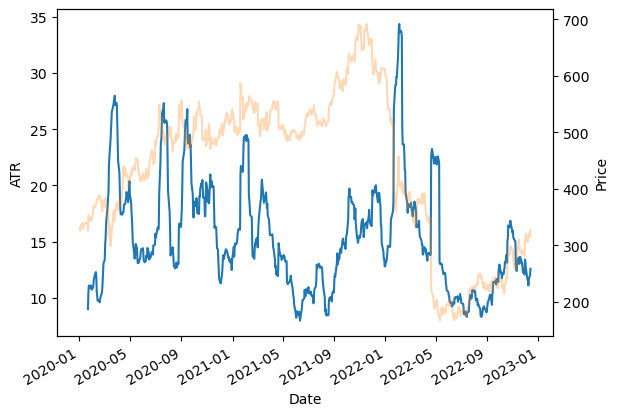

In [49]:
# plot close, set secondary_y = True, ATR and Price
fig,ax = plt.subplots()
avg_tr.plot(ax=ax)
ax2 = data['Close'].plot(ax=ax,secondary_y=True,alpha=.3)
ax.set_ylabel('ATR')
ax2.set_ylabel('Price')

In [ ]:
# sharp ratio: rep both risk and return, brings understanding to the return of the investment compared to its risk
# SR = Rp (return from portfolio) - Rf(risk free return)/std of portfolio (or the risk)
# used to eval the risk-adj performance of mutual fund, demonstrates the return on holding a risky asset

In [43]:
tickers = ['AAPL','MSFT','NFLX','IBM']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start)
data.head()

Attributes  Adj Close                                          Close  \
Symbols          AAPL        MSFT        NFLX         IBM       AAPL   
Date                                                                   
2020-01-02  73.561531  156.151947  329.809998  111.586510  75.087502   
2020-01-03  72.846352  154.207581  325.899994  110.696594  74.357498   
2020-01-06  73.426834  154.606171  335.829987  110.498833  74.949997   
2020-01-07  73.081497  153.196518  330.750000  110.572968  74.597504   
2020-01-08  74.257111  155.636673  339.260010  111.495865  75.797501   

Attributes                                           High              ...  \
Symbols           MSFT        NFLX         IBM       AAPL        MSFT  ...   
Date                                                                   ...   
2020-01-02  160.619995  329.809998  129.464630  75.150002  160.729996  ...   
2020-01-03  158.619995  325.899994  128.432129  75.144997  159.949997  ...   
2020-01-06  159.029999  335.829987  128.202682  74.989998  159.100006  ...   
2020-01-07  157.580002  330.750000  128.288712  75.224998  159.669998  ...   
2020-01-08  160.089996  339.260010  129.359467  76.110001  160.800003  ...   

Attributes         Low                   Open                          \
Symbols           NFLX         IBM       AAPL        MSFT        NFLX   
Date                                                                    
2020-01-02  324.779999  128.843216  74.059998  158.779999  326.100006   
2020-01-03  325.529999  127.686424  74.287498  158.320007  326.779999   
2020-01-06  321.200012  127.342255  73.447502  157.080002  323.119995   
2020-01-07  330.299988  127.533463  74.959999  159.320007  336.470001   
2020-01-08  331.049988  128.030594  74.290001  158.929993  331.489990   

Attributes                   Volume                                    
Symbols            IBM         AAPL        MSFT       NFLX        IBM  
Date                                                                   
2020-01-02  129.063095  135480400.0  22622100.0  4485800.0  3293436.0  
2020-01-03  127.695984  146322800.0  21116200.0  3806900.0  2482890.0  
2020-01-06  127.552582  118387200.0  20813700.0  5663100.0  2537073.0  
2020-01-07  127.810707  108872000.0  21634100.0  4703200.0  3232977.0  
2020-01-08  128.594650  132079200.0  27746500.0  7104500.0  4545916.0  

[5 rows x 24 columns]

In [44]:
data = data['Adj Close']
data

Symbols,AAPL,MSFT,NFLX,IBM
Date,,,,
2020-01-02,73.561531,156.151947,329.809998,111.586510
2020-01-03,72.846352,154.207581,325.899994,110.696594
2020-01-06,73.426834,154.606171,335.829987,110.498833
2020-01-07,73.081497,153.196518,330.750000,110.572968
2020-01-08,74.257111,155.636673,339.260010,111.495865
...,...,...,...,...
2022-12-07,140.940002,244.369995,308.420013,147.270004
2022-12-08,142.649994,247.399994,310.260010,147.779999
2022-12-09,142.160004,245.419998,320.010010,147.050003


In [49]:
portfolio = [.25,.15,.40,.20]
np.sum(portfolio)

1.0

In [50]:
# percentage change
data/data.shift()

Symbols,AAPL,MSFT,NFLX,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,0.990278,0.987548,0.988145,0.992025
2020-01-06,1.007969,1.002585,1.030469,0.998213
2020-01-07,0.995297,0.990882,0.984873,1.000671
2020-01-08,1.016086,1.015928,1.025729,1.008347
...,...,...,...,...
2022-12-07,0.986215,0.996940,1.009360,0.998441
2022-12-08,1.012133,1.012399,1.005966,1.003463
2022-12-09,0.996565,0.991997,1.031425,0.995060


In [52]:
# sum of all percentage change
np.sum(np.log(data/data.shift())*portfolio,axis=1)

Date
2020-01-02    0.000000
2020-01-03   -0.010694
2020-01-06    0.014020
2020-01-07   -0.008515
2020-01-08    0.018184
                ...   
2022-12-07   -0.000515
2022-12-08    0.007934
2022-12-09    0.009321
2022-12-12    0.005169
2022-12-13    0.020705
Length: 744, dtype: float64

In [53]:
# log return: one method for calculating return
# natural log of ending value/beginning value

# simple return: weighted sum of simple returns of all constituents of portfolio

lr = np.sum(np.log(data/data.shift())*portfolio,axis=1)
lr

Date
2020-01-02    0.000000
2020-01-03   -0.010694
2020-01-06    0.014020
2020-01-07   -0.008515
2020-01-08    0.018184
                ...   
2022-12-07   -0.000515
2022-12-08    0.007934
2022-12-09    0.009321
2022-12-12    0.005169
2022-12-13    0.020705
Length: 744, dtype: float64

<AxesSubplot:>

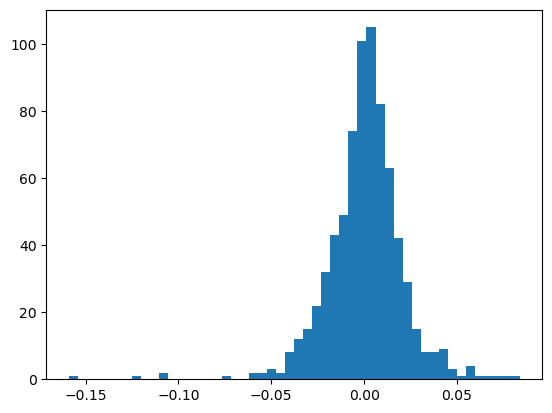

In [57]:
# visual log return
fig,ax = plt.subplots()
lr.hist(bins=50,ax=ax,grid=False)

In [58]:
# std of portfolio
lr.std()

0.020879888384388038

In [59]:
lr.mean()

0.000405285006144645

In [60]:
# sharp ration = mean/std
sharpr = lr.mean()/lr.std()
sharpr

0.019410305202956828

In [63]:
# 252 trading days in a year raised to **0.5
# analyze sharp ratio (asr)
asr = sharpr * 252**0.5
asr

0.30812904263332125

In [69]:
# compare with other portfolio and optimize portfolios
weight = np.random.random(4)
weight/=weight.sum()
weight

array([0.46673377, 0.4005591 , 0.01128408, 0.12142304])

In [70]:
lr2 = np.sum(np.log(data/data.shift())*weight,axis=1)
lr2

Date
2020-01-02    0.000000
2020-01-03   -0.010686
2020-01-06    0.004860
2020-01-07   -0.005960
2020-01-08    0.015074
                ...   
2022-12-07   -0.007790
2022-12-08    0.011052
2022-12-09   -0.005077
2022-12-12    0.020595
2022-12-13    0.014484
Length: 744, dtype: float64

In [71]:
sharpr2 = lr2.mean()/lr2.std()
sharpr2

0.03712873912131284

In [72]:
asr2 = sharpr2 * 252**0.5
asr2

0.5894004612503316

In [ ]:
# Monte Carlo Simulation: applying sharp ratio to create a efficient frontier
# used to understand the effect of uncertainity and randomness in forecasting models
# aka monte carlo method, multiple probability sim: estimating to possible outcomes of a uncertain event
# if there are too many variables which affects the outcome, it can simulate to find the optimal value
# efficient frontier is a set of optimal portfolio that offers highest or lowest expected returns for given level risk
# portfolio lies below efficient frontier are sub optimal b/c it will not provide enough returns for level of risk

In [2]:
# 7 means 6, repeating it two times
def roll_dice():
    return(np.sum(np.random.randint(1,7,2)))

In [3]:
roll_dice()

7

In [4]:
# whenever dice adds to 7 = gain $5 for any other number loose $1
def mcs(runs=1000):
    results = np.zeros(2)
    for _ in range(runs):
        if roll_dice()==7:
            results[0] += 1
        else:
            results[1] += 1
    return results

In [5]:
mcs()

array([180., 820.])

In [7]:
# getting first entry
results = np.zeros(1000)
for i in range(1000):
    results[i] = mcs()[0]
results

array([173., 177., 151., 172., 177., 161., 170., 171., 182., 172., 174.,
       166., 173., 185., 172., 158., 178., 148., 157., 150., 163., 165.,
       151., 173., 176., 168., 156., 176., 161., 157., 162., 155., 183.,
       161., 153., 190., 179., 163., 181., 167., 167., 166., 155., 146.,
       161., 178., 183., 160., 148., 160., 165., 169., 162., 148., 156.,
       162., 178., 189., 161., 158., 151., 159., 158., 172., 168., 189.,
       164., 161., 144., 159., 167., 175., 176., 170., 144., 172., 173.,
       165., 165., 179., 173., 172., 161., 165., 186., 150., 159., 155.,
       154., 163., 205., 170., 173., 170., 164., 154., 171., 173., 158.,
       178., 157., 157., 184., 156., 170., 178., 190., 166., 192., 179.,
       155., 180., 176., 143., 200., 178., 169., 175., 159., 150., 168.,
       168., 169., 165., 148., 144., 179., 172., 159., 157., 163., 153.,
       164., 161., 183., 155., 175., 175., 145., 145., 167., 179., 169.,
       164., 166., 156., 182., 180., 182., 177., 17

(array([  2.,  11.,  15.,  46.,  88., 145., 158., 167., 131., 118.,  74.,
         30.,   9.,   5.,   1.]),
 array([131.        , 135.93333333, 140.86666667, 145.8       ,
        150.73333333, 155.66666667, 160.6       , 165.53333333,
        170.46666667, 175.4       , 180.33333333, 185.26666667,
        190.2       , 195.13333333, 200.06666667, 205.        ]),
 <BarContainer object of 15 artists>)

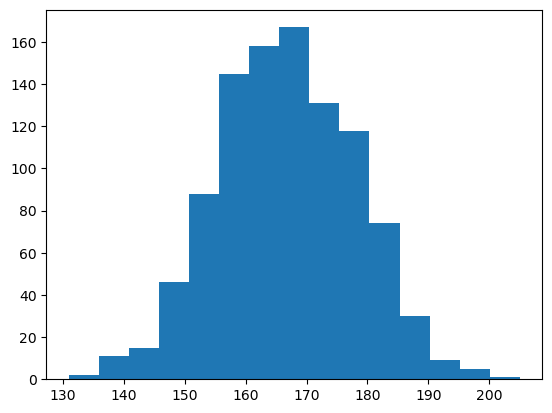

In [8]:
fig,ax=plt.subplots()
ax.hist(results,bins=15)

In [9]:
results.mean()*5

833.58

In [10]:
1000-results.mean()

833.284

In [11]:
833.58 - 833.284

0.2960000000000491

In [12]:
tickers = ['AAPL','MSFT','NFLX','IBM']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start)
data = data['Adj Close']
data.head()

Symbols,AAPL,MSFT,NFLX,IBM
Date,,,,
2020-01-02,73.561539,156.151932,329.809998,111.586502
2020-01-03,72.846375,154.207581,325.899994,110.696587
2020-01-06,73.426834,154.606171,335.829987,110.498840
2020-01-07,73.081482,153.196518,330.750000,110.572968
2020-01-08,74.257111,155.636673,339.260010,111.495865


In [13]:
lr = np.log(data/data.shift())
lr

Symbols,AAPL,MSFT,NFLX,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012530,-0.011926,-0.008007
2020-01-06,0.007937,0.002581,0.030014,-0.001788
2020-01-07,-0.004714,-0.009160,-0.015242,0.000671
2020-01-08,0.015959,0.015803,0.025404,0.008312
...,...,...,...,...
2022-12-07,-0.013881,-0.003064,0.009316,-0.001561
2022-12-08,0.012060,0.012323,0.005948,0.003457
2022-12-09,-0.003441,-0.008035,0.030942,-0.004952


In [14]:
weight = np.random.random(4)
weight/=weight.sum()
weight

array([0.37272601, 0.11588426, 0.29285663, 0.21853311])

In [34]:
# expected return
er = np.sum(lr.mean()*weight)*252
er

0.10418383346203612

In [35]:
# expected volatility: formula to speed up
ev = np.sqrt(np.dot(weight.T,(np.dot(lr.cov()*252,weight))))
ev

0.2991003830121089

In [37]:
# sharp ratio: expected return/expected volatility
sharpr = er/ev
sharpr

0.3483239720820361

In [55]:
# monte carlo sim
# runs = 5000
n = 5000
weights = np.zeros((n,4))
ers = np.zeros(n)
evs = np.zeros(n)
sharprs = np.zeros(n)

for i in range(n):
    weight = np.random.random(4)
    weight/=weight.sum()
    weights[i] = weight
    
    ers[i] = np.sum(lr.mean()*weight)*252
    evs[i] = np.sqrt(np.dot(weight.T,(np.dot(lr.cov()*252,weight))))
    sharprs[i] = ers[i]/evs[i]

In [56]:
sharprs.max()

0.6199056432183379

In [57]:
sharprs.argmax()

855

In [58]:
weights[855]

array([0.90237206, 0.06635067, 0.001865  , 0.02941228])

Text(0, 0.5, 'Expected Return')

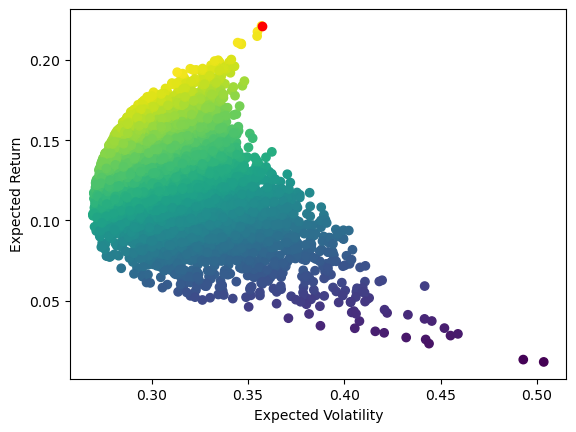

In [61]:
fig,ax=plt.subplots()
ax.scatter(evs,ers,c=sharprs)
ax.scatter(evs[sharprs.argmax()],ers[sharprs.argmax()],c='r')
ax.set_xlabel('Expected Volatility')
ax.set_ylabel('Expected Return')

In [62]:
pip install yfinance

In [63]:
pip install mplfinance

     -------------------------------------- 73.1/73.1 kB 403.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [65]:
# basic information
tsla = yf.Ticker('TSLA')
tsla.info

{'zip': '78725',
 'sector': 'Consumer Cyclical',
 'fullTimeEmployees': 99290,
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warrantie

In [93]:
print(f'Market Cap: {tsla.info["marketCap"]} \n')

Market Cap: 511061000192 



In [94]:
print(f'Employees: {tsla.info["fullTimeEmployees"]}\n')

Employees: 99290



In [ ]:
print(f'Business Summary: {tsla.info["longBusinessSummary"]}\n')

In [68]:
tsla.history(period='5d')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-12-07 00:00:00-05:00,175.029999,179.380005,172.220001,174.039993,84213300,0,0
2022-12-08 00:00:00-05:00,172.199997,175.199997,169.059998,173.440002,97624500,0,0
2022-12-09 00:00:00-05:00,173.839996,182.500000,173.360001,179.050003,104746600,0,0
2022-12-12 00:00:00-05:00,176.100006,177.369995,167.520004,167.820007,109794500,0,0
2022-12-13 00:00:00-05:00,174.869995,175.000000,156.910004,161.630005,160644711,0,0


In [69]:
tsla.history(period='5d',actions=False)

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-07 00:00:00-05:00,175.029999,179.380005,172.220001,174.039993,84213300
2022-12-08 00:00:00-05:00,172.199997,175.199997,169.059998,173.440002,97624500
2022-12-09 00:00:00-05:00,173.839996,182.500000,173.360001,179.050003,104746600
2022-12-12 00:00:00-05:00,176.100006,177.369995,167.520004,167.820007,109794500
2022-12-13 00:00:00-05:00,174.869995,175.000000,156.910004,161.570007,160781273


In [ ]:
tsla=yf.Ticker('tsla')
tsla.history(start='2021-02-20', end='2021-03-01',actions=False)

In [73]:
# fetch multiple tickers
# YTD: year to date refers to beginning of current calendar to the current date
# useful in analyzing business trends over time comparing performance data with other competitors in same industry
data = yf.download('AMZN AAPL TSLA', period='ytd',group_by='ticker',actions=False)
amzn = data['AMZN']
aapl = data['AAPL']

[*********************100%***********************]  3 of 3 completed


In [74]:
amzn.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000


In [75]:
amzn.to_csv('documents/AMZN.csv')

In [85]:
aapl = yf.Ticker('AAPL')
aapl.actions.tail(5)

,Dividends,Stock Splits
Date,,
2021-11-05 00:00:00-04:00,0.22,0.0
2022-02-04 00:00:00-05:00,0.22,0.0
2022-05-06 00:00:00-04:00,0.23,0.0
2022-08-05 00:00:00-04:00,0.23,0.0
2022-11-04 00:00:00-04:00,0.23,0.0


In [86]:
aapl.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,60.02%,% of Shares Held by Institutions
2,60.07%,% of Float Held by Institutions
3,5522,Number of Institutions Holding Shares


In [87]:
# tail for the latest data
aapl.recommendations.tail()

,Firm,To Grade,From Grade,Action
Date,,,,
2022-10-28 13:19:17,Wedbush,Outperform,,main
2022-11-07 12:39:27,Barclays,Equal-Weight,,main
2022-11-07 13:08:30,B of A Securities,Neutral,,main
2022-11-08 12:14:23,Morgan Stanley,Overweight,,main
2022-11-08 12:17:03,UBS,Buy,,main


In [88]:
aapl.calendar

,0,1
Earnings Date,2023-01-25 10:59:00,2023-01-30 12:00:00
Earnings Average,1.99,1.99
Earnings Low,1.86,1.86
Earnings High,2.12,2.12
Revenue Average,123264000000,123264000000
Revenue Low,117305000000,117305000000
Revenue High,129379000000,129379000000


In [89]:
# ISIN: 12 digit number
aapl.isin

'US0378331005'

In [ ]:
# corr means movement of stock with benchmark index
# ranges from -1 and 1 both inclusive
    # if r = 1 perfect positive corr
    # if r = -1 perfect negative corr
    # if r = 0 no corr

In [102]:
tickers = ['AAPL','MSFT','NFLX','IBM']
start = dt.datetime(2020,1,1)
data = pdr.get_data_yahoo(tickers,start)
data = data['Adj Close']
data.head()

Symbols,AAPL,MSFT,NFLX,IBM
Date,,,,
2020-01-02,73.561539,156.151947,329.809998,111.586494
2020-01-03,72.846367,154.207596,325.899994,110.696579
2020-01-06,73.426826,154.606201,335.829987,110.498833
2020-01-07,73.081490,153.196533,330.750000,110.572975
2020-01-08,74.257118,155.636673,339.260010,111.495872


In [103]:
lr = np.log(data/data.shift())
lr

Symbols,AAPL,MSFT,NFLX,IBM
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.012530,-0.011926,-0.008007
2020-01-06,0.007937,0.002582,0.030014,-0.001788
2020-01-07,-0.004714,-0.009160,-0.015242,0.000671
2020-01-08,0.015959,0.015803,0.025404,0.008312
...,...,...,...,...
2022-12-07,-0.013881,-0.003064,0.009316,-0.001561
2022-12-08,0.012060,0.012323,0.005948,0.003457
2022-12-09,-0.003441,-0.008035,0.030942,-0.004952


In [104]:
lr.corr()

Symbols,AAPL,MSFT,NFLX,IBM
Symbols,,,,
AAPL,1.000000,0.813227,0.465445,0.457473
MSFT,0.813227,1.000000,0.487225,0.476320
NFLX,0.465445,0.487225,1.000000,0.099000
IBM,0.457473,0.476320,0.099000,1.000000


In [116]:
# S&P 500 index: standard or poor index that tracts the performance of 500 largest cap companies in US
# ^GSPC
sp500 = pdr.get_data_yahoo('^GSPC',start)
sp500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,3258.139893,3235.530029,3244.669922,3257.850098,3459930000,3257.850098
2020-01-03,3246.149902,3222.340088,3226.360107,3234.850098,3484700000,3234.850098
2020-01-06,3246.840088,3214.639893,3217.550049,3246.280029,3702460000,3246.280029
2020-01-07,3244.909912,3232.429932,3241.860107,3237.179932,3435910000,3237.179932
2020-01-08,3267.070068,3236.669922,3238.590088,3253.050049,3726840000,3253.050049
...,...,...,...,...,...,...
2022-12-07,3957.570068,3922.679932,3933.280029,3933.919922,4118050000,3933.919922
2022-12-08,3974.189941,3935.830078,3947.790039,3963.510010,4006900000,3963.510010
2022-12-09,3977.020020,3933.040039,3954.169922,3934.379883,3888260000,3934.379883


In [117]:
lrs['SP500'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift())
lrs

Date
2017-12-14 00:00:00                                                  NaN
2017-12-15 00:00:00                                             0.008934
2017-12-18 00:00:00                                             0.005348
2017-12-19 00:00:00                                            -0.003235
2017-12-20 00:00:00                                            -0.000828
                                             ...                        
2022-12-08 00:00:00                                             0.007494
2022-12-09 00:00:00                                            -0.007377
2022-12-12 00:00:00                                             0.014178
2022-12-13 00:00:00                                             0.007263
SP500                  Date
2020-01-02         NaN
2020-01-03   -0.00...
Name: Adj Close, Length: 1259, dtype: object

In [119]:
lrs.corr()

<bound method Series.corr of Date
2017-12-14 00:00:00                                                  NaN
2017-12-15 00:00:00                                             0.008934
2017-12-18 00:00:00                                             0.005348
2017-12-19 00:00:00                                            -0.003235
2017-12-20 00:00:00                                            -0.000828
                                             ...                        
2022-12-08 00:00:00                                             0.007494
2022-12-09 00:00:00                                            -0.007377
2022-12-12 00:00:00                                             0.014178
2022-12-13 00:00:00                                             0.007263
SP500                  Date
2020-01-02         NaN
2020-01-03   -0.00...
Name: Adj Close, Length: 1259, dtype: object>

In [127]:
def test_correlation(ticker):
    df = pdr.get_data_yahoo(ticker,start)
    lr = lrs.copy()
    lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr

In [128]:
# LQD as instance
test_correlation('LQD')

<bound method Series.corr of Date
2017-12-14 00:00:00                                                  NaN
2017-12-15 00:00:00                                             0.008934
2017-12-18 00:00:00                                             0.005348
2017-12-19 00:00:00                                            -0.003235
2017-12-20 00:00:00                                            -0.000828
                                             ...                        
2022-12-09 00:00:00                                            -0.007377
2022-12-12 00:00:00                                             0.014178
2022-12-13 00:00:00                                             0.007263
SP500                  Date
2020-01-02         NaN
2020-01-03   -0.00...
LQD                    Date
2020-01-02         NaN
2020-01-03    0.00...
Name: Adj Close, Length: 1260, dtype: object>

In [129]:
test_correlation('TLT')

<bound method Series.corr of Date
2017-12-14 00:00:00                                                  NaN
2017-12-15 00:00:00                                             0.008934
2017-12-18 00:00:00                                             0.005348
2017-12-19 00:00:00                                            -0.003235
2017-12-20 00:00:00                                            -0.000828
                                             ...                        
2022-12-09 00:00:00                                            -0.007377
2022-12-12 00:00:00                                             0.014178
2022-12-13 00:00:00                                             0.007263
SP500                  Date
2020-01-02         NaN
2020-01-03   -0.00...
TLT                    Date
2020-01-02         NaN
2020-01-03    0.01...
Name: Adj Close, Length: 1260, dtype: object>

In [130]:
# visualization
def vis_corr(tick1,tick2):
    df = pdr.get_data_yahoo([tick1,tick2],start)
    df = df['Adj Close']
    df = df/df.iloc[0]
    fig,ax = plt.subplots()
    df.plot(ax=ax)

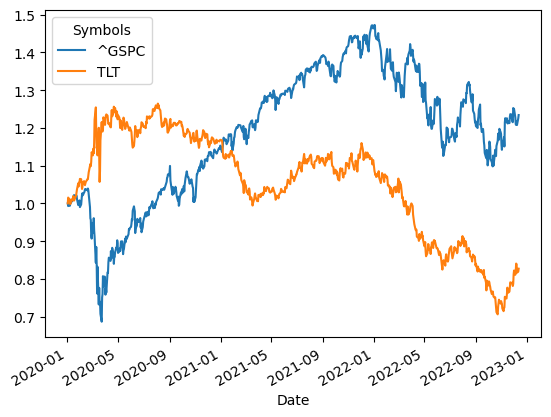

In [131]:
vis_corr('^GSPC','TLT')

In [ ]:
# significance of negative sign: identify how much the portofolio is at risk w/ negative correlation